# Deep Learning Fundamentals

## Initialization

In [1]:
# Load libraries
import latexify
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt

latexify.__version__

'0.4.2'

## Activation functions

In [2]:
# Sigmoid
@latexify.function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

sigmoid

In [3]:
# Tanh
@latexify.function
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

tanh

In [4]:
# ReLU
@latexify.function
def relu(x):
    # return np.maximum(0, x)
    return x if x > 0 else 0

relu

In [5]:
# Linear
@latexify.function
def linear(x):
    return x

linear

In [6]:
# Softmax
@latexify.function
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

softmax

## Loss functions

In [7]:
# Mean Squared Error
@latexify.function
def mse(y, y_hat):
    return np.mean(np.square(y - y_hat))
    # return np.mean((y - y_hat) ** 2)

mse

In [8]:
# Mean Absolute Error
@latexify.function
def mae(y, y_hat):
    return np.mean(np.abs(y - y_hat))

mae

In [9]:
# Binary Cross Entropy
@latexify.function
def binary_cross_entropy(y, y_hat):
    return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

binary_cross_entropy

In [10]:
# Categorical Cross Entropy

# Assumes y and y_hat are of the same shape and uses one-hot encoding
@latexify.function
def categorical_cross_entropy(y, y_hat):
    return -np.mean(y * np.log(y_hat))

categorical_cross_entropy

In [11]:
# Categorical Cross Entropy

# if y contains class indices instead of being one-hot encoded,
# and y_hat is a 2D array where each row corresponds to a set of class probabilities for a given sample
@latexify.function
def categorical_cross_entropy(y, y_hat):
    # return -np.mean(np.log(y_hat[np.arange(len(y)), y]))
    valid_indices = y_hat[np.arange(len(y)), y]
    return -np.mean(np.log(valid_indices))

categorical_cross_entropy

## Forward propagation

In [12]:
# Feed Forward using sigmoid activation and mse loss for a neural network with 1 hidden layer
def feed_forward(inputs, outputs, weights):
    # hidden layer sum product and activation
    sum_product = np.dot(inputs, weights[0]) + weights[1]
    activation = sigmoid(sum_product)

    # output layer sum product and loss
    pred_out = np.dot(activation, weights[2]) + weights[3]
    loss = mse(outputs, pred_out)
    return loss

<center>
<table>
    <thead>
        <tr>
            <th style="text-align: center;">Simple Neural Network Example</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>
                <img src="example_simple_nn.png" alt="Toy Neural Network Example" height="400">
            </td>
        </tr>
    </tbody>
</table>
</center>

In [13]:
# Set example inputs and outputs
x = np.array([[1,1]])
y = np.array([[0]])

# Initialize weights and biases (2 input nodes, 3 hidden nodes, 1 output node)
W = [
    np.array([[-0.0053, 0.3793],
              [-0.5820, -0.5204],
              [-0.2723, 0.1896]], dtype=np.float32).T, 
    np.array([-0.0140, 0.5607, -0.0628], dtype=np.float32), 
    np.array([[ 0.1528, -0.1745, -0.1135]], dtype=np.float32).T, 
    np.array([-0.5516], dtype=np.float32)
]

print("Inputs:", x, end="\n\n")
print("Outputs:", y, end="\n\n")
print("Weights and Biases:")
for w in W:
    print(w, end="\n\n")

print('Original Loss:', feed_forward(x, y, W))

Inputs: [[1 1]]

Outputs: [[0]]

Weights and Biases:
[[-0.0053 -0.582  -0.2723]
 [ 0.3793 -0.5204  0.1896]]

[-0.014   0.5607 -0.0628]

[[ 0.1528]
 [-0.1745]
 [-0.1135]]

[-0.5516]

Original Loss: 0.33455008989960927


## Back propagation

### Gradient descent (No chain rule)

In [14]:
# Gradient Descent - No chain rule
def update_weights(inputs, outputs, weights, lr):
    original_weights = deepcopy(weights)
    temp_weights = deepcopy(weights)
    updated_weights = deepcopy(weights)
    original_loss = feed_forward(inputs, outputs, original_weights)
    for i, layer in enumerate(original_weights):
        for index, weight in np.ndenumerate(layer):
            temp_weights = deepcopy(weights)
            temp_weights[i][index] += 0.0001
            _loss_plus = feed_forward(inputs, outputs, temp_weights)
            grad = (_loss_plus - original_loss)/(0.0001)
            updated_weights[i][index] -= grad*lr
    return updated_weights

In [15]:
# Calculate updated weights and loss
updated_weights = update_weights(x, y, W, 1)
print("Updated Weights and Biases:")
for w in updated_weights:
    print(w, end="\n\n")
updated_loss = feed_forward(x, y, updated_weights)
print('Updated Loss:', updated_loss)

Updated Weights and Biases:
[[ 0.03748801 -0.62894595 -0.30494714]
 [ 0.42208242 -0.5673459   0.156948  ]]

[ 0.02878801  0.51375407 -0.09545201]

[[0.8341824 ]
 [0.25095794]
 [0.4228859 ]]

[0.60529804]

Updated Loss: 1.9385937359558543


### Gradient descent (Using chain rule)

In [16]:
sum_product = np.dot(x,W[0])+ W[1]
activation = 1/(1+np.exp(-sum_product))
predicted_value = np.dot(activation, W[2]) + W[3]

In [17]:
tmp = W[0][0][0] - (-2*(0-(predicted_value[0][0]))*(W[2][0][0])*activation[0,0]*(1-activation[0,0])*x[0][0])
print(f"Updated Weight W11 (chain rule vs no chain rule):\n{tmp} | {updated_weights[0][0][0]}")

Updated Weight W11 (chain rule vs no chain rule):
0.03748860333147175 | 0.03748801350593567


In [18]:
tmp = W[0][0][1] - (-2*(0-(predicted_value[0][0]))*(W[2][1][0])*activation[0,1]*(1-activation[0,1])*x[0][0])
print(f"Updated Weight W12 (chain rule vs no chain rule):\n{tmp} | {updated_weights[0][0][1]}")

Updated Weight W12 (chain rule vs no chain rule):
-0.6289373468565382 | -0.6289459466934204


In [19]:
tmp = W[0][0][2] - (-2*(0-(predicted_value[0][0]))*(W[2][2][0])*activation[0,2]*(1-activation[0,2])*x[0][0])
print(f"Updated Weight W13 (chain rule vs no chain rule):\n{tmp} | {updated_weights[0][0][2]}")

Updated Weight W13 (chain rule vs no chain rule):
-0.304951263947996 | -0.3049471378326416


In [20]:
tmp = W[0][1][0] - (-2*(0-(predicted_value[0][0]))*(W[2][0][0])*activation[0,0]*(1-activation[0,0])*x[0][1])
print(f"Updated Weight W21 (chain rule vs no chain rule):\n{tmp} | {updated_weights[0][1][0]}")

Updated Weight W21 (chain rule vs no chain rule):
0.42208860145914084 | 0.42208242416381836


In [21]:
tmp = W[0][1][1] - (-2*(0-(predicted_value[0][0]))*(W[2][1][0])*activation[0,1]*(1-activation[0,1])*x[0][1])
print(f"Updated Weight W22 (chain rule vs no chain rule):\n{tmp} | {updated_weights[0][1][1]}")

Updated Weight W22 (chain rule vs no chain rule):
-0.5673373173880019 | -0.567345917224884


In [22]:
tmp = W[0][1][2] - (-2*(0-(predicted_value[0][0]))*(W[2][2][0])*activation[0,2]*(1-activation[0,2])*x[0][1])
print(f"Updated Weight W23 (chain rule vs no chain rule):\n{tmp} | {updated_weights[0][1][2]}")

Updated Weight W23 (chain rule vs no chain rule):
0.15694874675699821 | 0.1569480001926422


In [23]:
tmp = W[1][0] - (-2*(0-(predicted_value[0][0]))*activation[0,0]*(1-activation[0,0])*W[2][0][0])
print(f"Updated Bias B1 (chain rule vs no chain rule):\n{tmp} | {updated_weights[1][0]}")


Updated Bias B1 (chain rule vs no chain rule):
0.028788602743620932 | 0.028788011521100998


In [24]:
tmp = W[1][1] - (-2*(0-(predicted_value[0][0]))*activation[0,1]*(1-activation[0,1])*W[2][1][0])
print(f"Updated Bias B2 (chain rule vs no chain rule):\n{tmp} | {updated_weights[1][1]}")

Updated Bias B2 (chain rule vs no chain rule):
0.5137626696420274 | 0.5137540698051453


In [25]:
tmp = W[1][2] - (-2*(0-(predicted_value[0][0]))*activation[0,2]*(1-activation[0,2])*W[2][2][0])
print(f"Updated Bias B3 (chain rule vs no chain rule):\n{tmp} | {updated_weights[1][2]}")

Updated Bias B3 (chain rule vs no chain rule):
-0.0954512566166247 | -0.09545201063156128


In [26]:
tmp = W[2][0][0]-(-2*(0-(predicted_value[0][0]))*activation[0][0])
print(f"Updated Weight W31 (chain rule vs no chain rule):\n{tmp} | {updated_weights[2][0][0]}")

Updated Weight W31 (chain rule vs no chain rule):
0.8342055621416937 | 0.8341823816299438


In [27]:
tmp = W[2][1][0]-(-2*(0-(predicted_value[0][0]))*activation[0][1])
print(f"Updated Weight W32 (chain rule vs no chain rule):\n{tmp} | {updated_weights[2][1][0]}")

Updated Weight W32 (chain rule vs no chain rule):
0.2509642654210383 | 0.2509579360485077


In [28]:
tmp = W[2][2][0]-(-2*(0-(predicted_value[0][0]))*activation[0][2])
print(f"Updated Weight W33 (chain rule vs no chain rule):\n{tmp} | {updated_weights[2][2][0]}")

Updated Weight W33 (chain rule vs no chain rule):
0.422898309408289 | 0.4228858947753906


In [29]:
tmp = W[3][0]-(-2*(0-(predicted_value[0][0])))
print(f"Updated Bias B4 (chain rule vs no chain rule):\n{tmp} | {updated_weights[3][0]}")

Updated Bias B4 (chain rule vs no chain rule):
0.6052061234525776 | 0.6052980422973633


### Feedforward and Backpropagation together

In [30]:
# Gradient Descent - No chain rule
def update_weights(inputs, outputs, weights, lr):
    original_weights = deepcopy(weights)
    temp_weights = deepcopy(weights)
    updated_weights = deepcopy(weights)
    original_loss = feed_forward(inputs, outputs, original_weights)
    for i, layer in enumerate(original_weights):
        for index, weight in np.ndenumerate(layer):
            temp_weights = deepcopy(weights)
            temp_weights[i][index] += 0.0001
            _loss_plus = feed_forward(inputs, outputs, temp_weights)
            grad = (_loss_plus - original_loss)/(0.0001)
            updated_weights[i][index] -= grad*lr
    return updated_weights, original_loss

In [31]:
# Reset weights
W = [
    np.array([[-0.0053, 0.3793],
              [-0.5820, -0.5204],
              [-0.2723, 0.1896]], dtype=np.float32).T, 
    np.array([-0.0140, 0.5607, -0.0628], dtype=np.float32), 
    np.array([[ 0.1528, -0.1745, -0.1135]], dtype=np.float32).T, 
    np.array([-0.5516], dtype=np.float32)
]

Epoch 0: Loss: 0.3346
Epoch 10: Loss: 0.1669
Epoch 20: Loss: 0.0832
Epoch 30: Loss: 0.0414
Epoch 40: Loss: 0.0206
Epoch 50: Loss: 0.0102
Epoch 60: Loss: 0.0051
Epoch 70: Loss: 0.0025
Epoch 80: Loss: 0.0012
Epoch 90: Loss: 0.0006


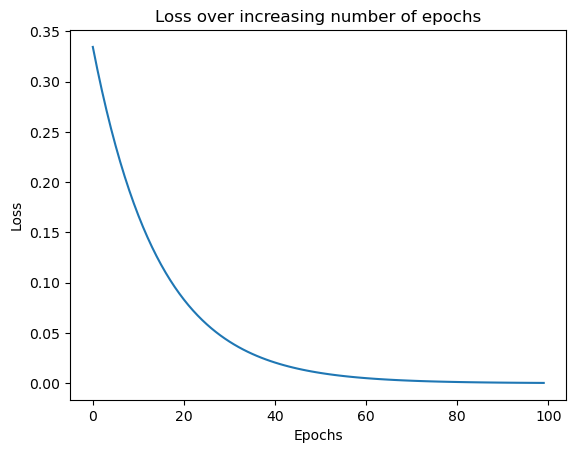

In [32]:
# Gradient Descent
losses = []
lr = 0.01
epochs = 100
for epoch in range(epochs):
    W, loss = update_weights(x,y,W,lr)
    losses.append(loss)
    if epoch % 10 == 0:
        print(f'Epoch {epoch}: Loss: {loss:.4f}')
plt.plot(losses)
plt.title('Loss over increasing number of epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [33]:
# Show final weights
print("Final Weights and Biases:")
for w in W:
    print(w, end="\n\n")

Final Weights and Biases:
[[ 0.01424004 -0.5907864  -0.27549535]
 [ 0.39883757 -0.52918637  0.18640439]]

[ 0.00554004  0.5519136  -0.06599568]

[[ 0.3475135 ]
 [-0.05529078]
 [ 0.03760847]]

[-0.22443289]



In [34]:
# Calculate predicted output
sum_product = np.dot(x,W[0])+ W[1]
activation = 1/(1+np.exp(-sum_product))
output = np.dot(activation, W[2]) + W[3]

print(f"Predicted Output: {output[0][0]}")

Predicted Output: -0.017478102528689282


# Learning Rate

Fit the following equation:
    $y = 3 * x$

In [35]:
# Set example inputs and outputs
x = [[1],[2],[3],[4]]
y = [[3],[6],[9],[12]]

Feed forward for this specific case would be:
    $Y = w⋅x + b$

In [36]:
# Define feed forward function
def feed_forward(inputs, outputs, weights):
    out = np.dot(inputs,weights[0])+ weights[1]
    mse_out = mse(outputs, out)
    return mse_out

In [37]:
# Define update weights function
def update_weights(inputs, outputs, weights, lr):
    original_weights = deepcopy(weights)
    org_loss = feed_forward(inputs, outputs, original_weights)
    updated_weights = deepcopy(weights)
    for i, layer in enumerate(original_weights):
        for index, weight in np.ndenumerate(layer):
            temp_weights = deepcopy(weights)
            temp_weights[i][index] += 0.0001
            _loss_plus = feed_forward(inputs, outputs, temp_weights)
            grad = (_loss_plus - org_loss)/(0.0001)
            updated_weights[i][index] -= grad*lr
    return updated_weights

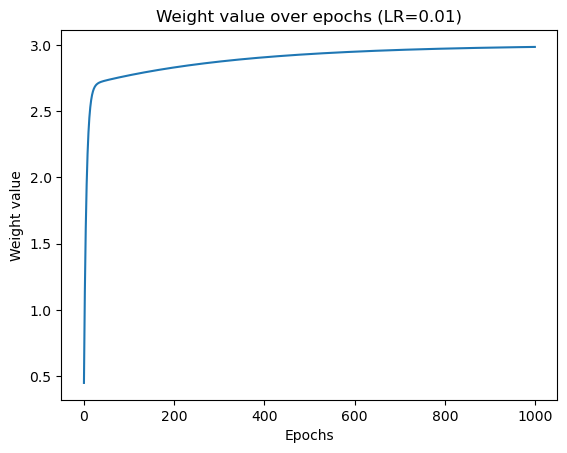

In [38]:
# Initialize weights and biases to zero
W = [np.array([[0]], dtype=np.float32),
     np.array([[0]], dtype=np.float32)]

# Leverage update_weights function with learning rate of 0.01
history = []
epochs = 1000
for _ in range(epochs):
    W = update_weights(x,y,W,0.01)
    history.append(W[0][0][0])

# Plot weight value over epochs
%matplotlib inline
plt.plot(history)
plt.title('Weight value over epochs (LR=0.01)')
plt.xlabel('Epochs')
plt.ylabel('Weight value')
plt.show()

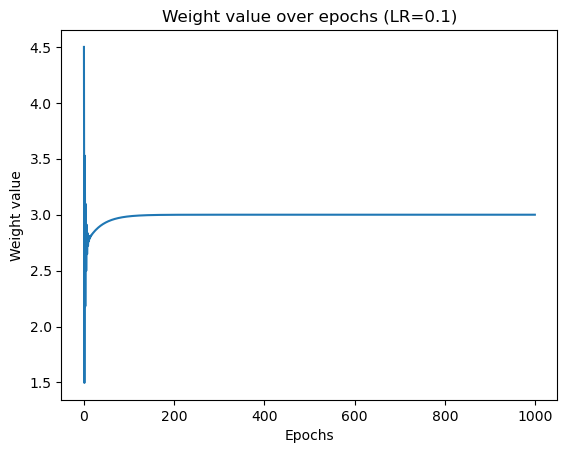

In [39]:
# Initialize weights and biases to zero
W = [np.array([[0]], dtype=np.float32),
     np.array([[0]], dtype=np.float32)]

# Leverage update_weights function with learning rate of 0.1
history = []
epochs = 1000
for _ in range(epochs):
    W = update_weights(x,y,W,0.1)
    history.append(W[0][0][0])

# Plot weight value over epochs
%matplotlib inline
plt.plot(history)
plt.title('Weight value over epochs (LR=0.1)')
plt.xlabel('Epochs')
plt.ylabel('Weight value')
plt.show()

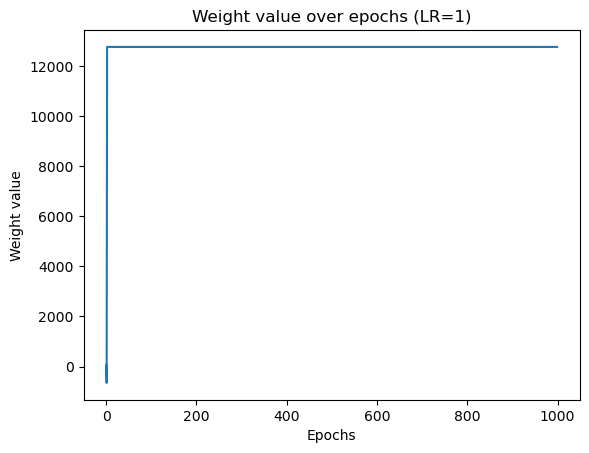

In [40]:
# Initialize weights and biases to zero
W = [np.array([[0]], dtype=np.float32),
     np.array([[0]], dtype=np.float32)]

# Leverage update_weights function with learning rate of 1
history = []
epochs = 1000
for _ in range(epochs):
    W = update_weights(x,y,W,1)
    history.append(W[0][0][0])

# Plot weight value over epochs
%matplotlib inline
plt.plot(history)
plt.title('Weight value over epochs (LR=1)')
plt.xlabel('Epochs')
plt.ylabel('Weight value')
plt.show()

In [41]:
# Modify update_weights function to print out important values at each epoch
def update_weights(inputs, outputs, weights, lr):
    original_weights = deepcopy(weights)
    org_loss = feed_forward(inputs, outputs, original_weights)
    updated_weights = deepcopy(weights)
    for i, layer in enumerate(original_weights):
        for index, weight in np.ndenumerate(layer):
            temp_weights = deepcopy(weights)
            temp_weights[i][index] += 0.0001
            _loss_plus = feed_forward(inputs, outputs, temp_weights)
            grad = (_loss_plus - org_loss)/(0.0001)
            updated_weights[i][index] -= grad*lr
            if(i % 2 == 0):
                print('weight value:', np.round(original_weights[i][index],2), 
                      'original loss:', np.round(org_loss,2), 
                      'loss_plus:', np.round(_loss_plus,2), 
                      'gradient:', np.round(grad,2), 
                      'updated_weights:', np.round(updated_weights[i][index],2))
    return updated_weights

weight value: 0.0 original loss: 67.5 loss_plus: 67.5 gradient: -45.0 updated_weights: 0.45
weight value: 0.45 original loss: 46.88 loss_plus: 46.88 gradient: -37.49 updated_weights: 0.82
weight value: 0.82 original loss: 32.57 loss_plus: 32.57 gradient: -31.26 updated_weights: 1.14
weight value: 1.14 original loss: 22.64 loss_plus: 22.64 gradient: -26.05 updated_weights: 1.4
weight value: 1.4 original loss: 15.75 loss_plus: 15.75 gradient: -21.72 updated_weights: 1.62
weight value: 1.62 original loss: 10.97 loss_plus: 10.97 gradient: -18.1 updated_weights: 1.8
weight value: 1.8 original loss: 7.65 loss_plus: 7.65 gradient: -15.09 updated_weights: 1.95
weight value: 1.95 original loss: 5.35 loss_plus: 5.35 gradient: -12.59 updated_weights: 2.07
weight value: 2.07 original loss: 3.75 loss_plus: 3.75 gradient: -10.49 updated_weights: 2.18
weight value: 2.18 original loss: 2.64 loss_plus: 2.64 gradient: -8.75 updated_weights: 2.27


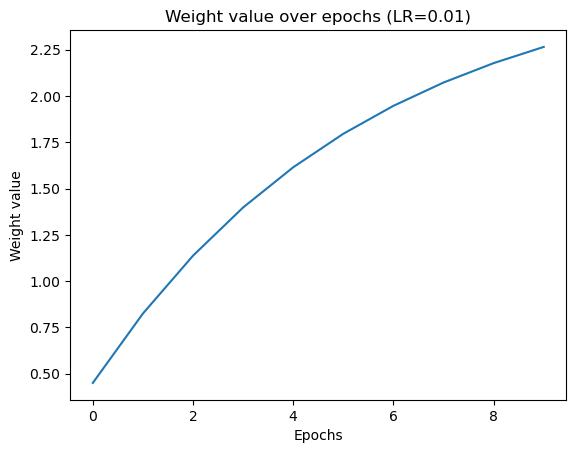

In [42]:
# Initialize weights and biases to zero
W = [np.array([[0]], dtype=np.float32),
     np.array([[0]], dtype=np.float32)]

# Leverage update_weights function with learning rate of 0.01
history = []
epochs = 10
for _ in range(epochs):
    W = update_weights(x,y,W,0.01)
    history.append(W[0][0][0])

# Plot weight value over epochs
%matplotlib inline
plt.plot(history)
plt.title('Weight value over epochs (LR=0.01)')
plt.xlabel('Epochs')
plt.ylabel('Weight value')
plt.show()

weight value: 0.0 original loss: 67.5 loss_plus: 67.5 gradient: -45.0 updated_weights: 4.5
weight value: 4.5 original loss: 30.37 loss_plus: 30.38 gradient: 30.04 updated_weights: 1.5
weight value: 1.5 original loss: 13.79 loss_plus: 13.78 gradient: -20.31 updated_weights: 3.53
weight value: 3.53 original loss: 6.25 loss_plus: 6.26 gradient: 13.46 updated_weights: 2.18
weight value: 2.18 original loss: 2.85 loss_plus: 2.85 gradient: -9.14 updated_weights: 3.1
weight value: 3.1 original loss: 1.33 loss_plus: 1.33 gradient: 5.97 updated_weights: 2.5
weight value: 2.5 original loss: 0.65 loss_plus: 0.65 gradient: -4.12 updated_weights: 2.91
weight value: 2.91 original loss: 0.34 loss_plus: 0.34 gradient: 2.63 updated_weights: 2.65
weight value: 2.65 original loss: 0.2 loss_plus: 0.2 gradient: -1.88 updated_weights: 2.84
weight value: 2.84 original loss: 0.13 loss_plus: 0.13 gradient: 1.14 updated_weights: 2.72


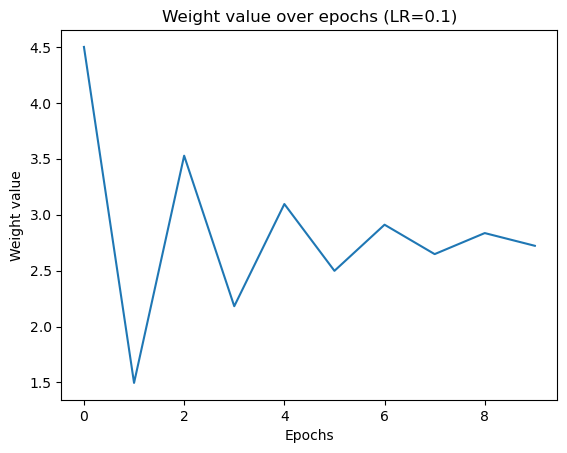

In [43]:
# Initialize weights and biases to zero
W = [np.array([[0]], dtype=np.float32),
     np.array([[0]], dtype=np.float32)]

# Leverage update_weights function with learning rate of 0.1
history = []
epochs = 10
for _ in range(epochs):
    W = update_weights(x,y,W,0.1)
    history.append(W[0][0][0])

# Plot weight value over epochs
%matplotlib inline
plt.plot(history)
plt.title('Weight value over epochs (LR=0.1)')
plt.xlabel('Epochs')
plt.ylabel('Weight value')
plt.show()

weight value: 0.0 original loss: 67.5 loss_plus: 67.5 gradient: -45.0 updated_weights: 45.0
weight value: 45.0 original loss: 16604.45 loss_plus: 16604.52 gradient: 699.22 updated_weights: -654.22
weight value: -654.22 original loss: 4030779.1 loss_plus: 4030777.76 gradient: -13409.38 updated_weights: 12755.16
weight value: 12755.16 original loss: 1473935827.59 loss_plus: 1473935827.59 gradient: 0.0 updated_weights: 12755.16
weight value: 12755.16 original loss: 1473935827.59 loss_plus: 1473935827.59 gradient: 0.0 updated_weights: 12755.16
weight value: 12755.16 original loss: 1473935827.59 loss_plus: 1473935827.59 gradient: 0.0 updated_weights: 12755.16
weight value: 12755.16 original loss: 1473935827.59 loss_plus: 1473935827.59 gradient: 0.0 updated_weights: 12755.16
weight value: 12755.16 original loss: 1473935827.59 loss_plus: 1473935827.59 gradient: 0.0 updated_weights: 12755.16
weight value: 12755.16 original loss: 1473935827.59 loss_plus: 1473935827.59 gradient: 0.0 updated_weig

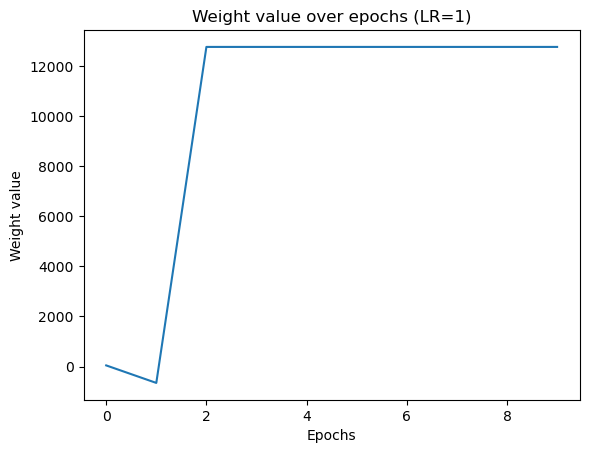

In [44]:
# Initialize weights and biases to zero
W = [np.array([[0]], dtype=np.float32),
     np.array([[0]], dtype=np.float32)]

# Leverage update_weights function with learning rate of 1
history = []
epochs = 10
for _ in range(epochs):
    W = update_weights(x,y,W,1)
    history.append(W[0][0][0])

# Plot weight value over epochs
%matplotlib inline
plt.plot(history)
plt.title('Weight value over epochs (LR=1)')
plt.xlabel('Epochs')
plt.ylabel('Weight value')
plt.show()